<a href="https://colab.research.google.com/github/youssouf2230/poubelle-intelligente/blob/main/Projet_classification_d'objet_recyclage_ou_Non.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 ## **classification** d'objet **recyclage** ou **Non**

In [1]:
# importation des données
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"diabatyoussouf","key":"774e75bd4891936036d47643946381d3"}'}

In [2]:
import os
import zipfile

# Créer un dossier kaggle et déplacer le fichier
os.makedirs('/root/.kaggle', exist_ok=True)
!mv kaggle.json /root/.kaggle/kaggle.json

# Donner les permissions appropriées
!chmod 600 /root/.kaggle/kaggle.json


In [3]:
!kaggle datasets download -d techsash/waste-classification-data

Dataset URL: https://www.kaggle.com/datasets/techsash/waste-classification-data
License(s): CC-BY-SA-4.0
 89% 379M/427M [00:00<00:00, 367MB/s]
100% 427M/427M [00:01<00:00, 382MB/s]


In [4]:
import zipfile
import os

zip_path = "waste-classification-data.zip"
extract_to = "/content/waste_dataset"
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

In [5]:
# importations des bibliothèques
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping,ModelCheckpoint

In [6]:
# récupérer les données
train_dir = '/content/waste_dataset/DATASET/TRAIN'
test_dir = '/content/waste_dataset/DATASET/TEST'

In [7]:
# lire les données avec image data generator
data_gen = ImageDataGenerator(rescale=1./255)
train_data = data_gen.flow_from_directory(
          train_dir,
          target_size=(224, 224),
          batch_size=32,
          class_mode='binary'
          )
test_data = data_gen.flow_from_directory(
          test_dir,
          target_size=(224, 224),
          batch_size=32,
          class_mode='binary'
          )

Found 22564 images belonging to 2 classes.
Found 2513 images belonging to 2 classes.


In [8]:
# recupères les images via generator
images_train, labels_train = next(train_data)
images_test, labels_test = next(test_data)

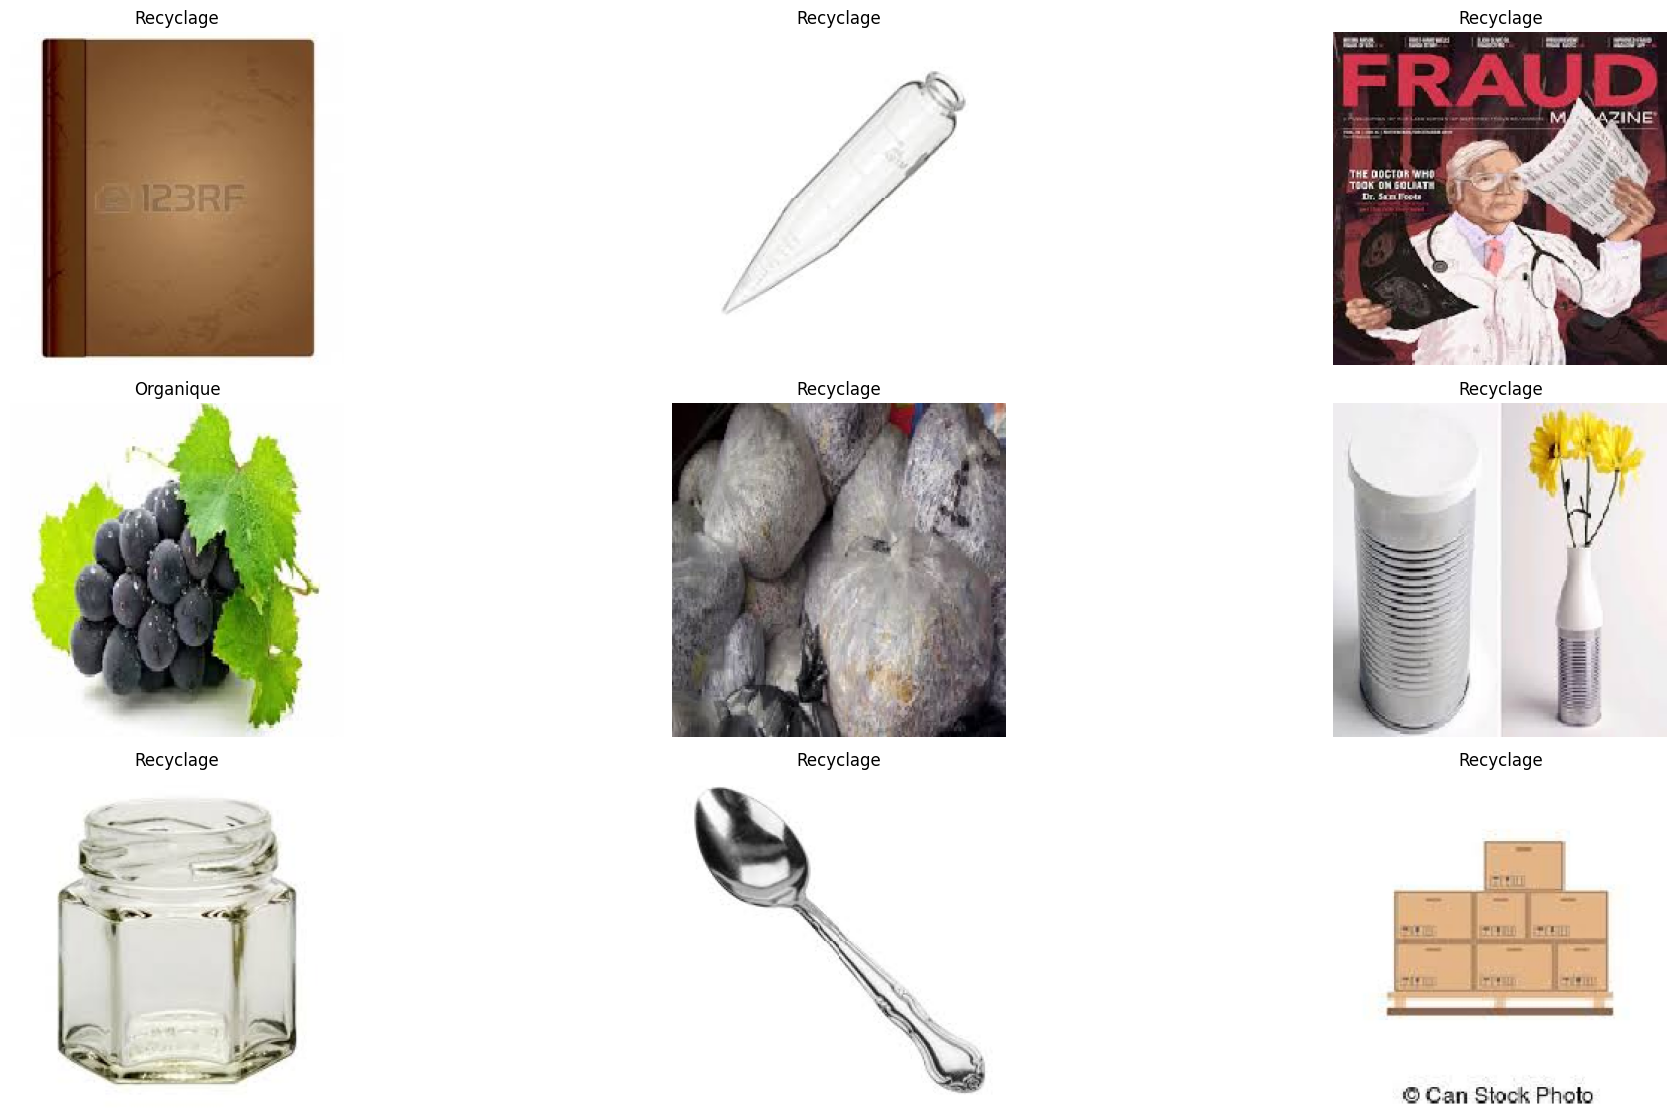

In [19]:
# afficher
import numpy as np

plt.figure(figsize=(20,15))
for i in range(9):
    plt.subplot(4,3,(i%12)+1)
    plt.imshow(images_train[i])
    plt.axis('off')
    plt.title("Recyclage" if labels_train[i].astype('int') == 1 else "Organique")
    plt.tight_layout()

In [13]:
# check shape
images_train.shape

(32, 224, 224, 3)

In [14]:
labels_train

array([1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0.,
       1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0.],
      dtype=float32)

In [15]:
# check correspond in label
train_data.class_indices

{'O': 0, 'R': 1}

In [26]:
from ast import mod
# create the model simple CNN
def model_simple():
  model = tf.keras.Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),

    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
  ])
  return model


In [9]:
# create stop
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
# check best model
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True)

In [28]:
# compile model
model = model_simple()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [29]:
# summary model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,889 (429.25 KB)

 Trainable params: 109,889 (429.25 KB)

 Non-trainable params: 0 (0.00 B)

In [30]:
# fit model
history = model.fit(
    train_data,
    epochs=20,
    validation_data=test_data,
    callbacks=[early_stopping, checkpoint]
)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


706/706 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - accuracy: 0.7648 - loss: 0.4920

706/706 ━━━━━━━━━━━━━━━━━━━━ 54s 61ms/step - accuracy: 0.7648 - loss: 0.4920 - val_accuracy: 0.8583 - val_loss: 0.3498
Epoch 2/20
705/706 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.8300 - loss: 0.3941

706/706 ━━━━━━━━━━━━━━━━━━━━ 40s 57ms/step - accuracy: 0.8300 - loss: 0.3941 - val_accuracy: 0.8563 - val_loss: 0.3429
Epoch 3/20
705/706 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.8488 - loss: 0.3627

706/706 ━━━━━━━━━━━━━━━━━━━━ 40s 57ms/step - accuracy: 0.8488 - loss: 0.3627 - val_accuracy: 0.8607 - val_loss: 0.3195
Epoch 4/20
705/706 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - accuracy: 0.8583 - loss: 0.3453

706/706 ━━━━━━━━━━━━━━━━━━━━ 40s 57ms/step - accuracy: 0.8583 - loss: 0.3453 - val_accuracy: 0.8882 - val_loss: 0.2707
Epoch 5/20
705/706 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - accuracy: 0.8576 - loss: 0.3418

706/706 ━━━━━━━━━━━━━━━━━━━━ 42s 59ms/step - accuracy: 0.8576 - loss: 0.3418 - val_accuracy: 0.9005 - val_loss: 0.2510
Epoch 6/20
706/706 ━━━━━━━━━━━━━━━━━━━━ 40s 56ms/step - accuracy: 0.8692 - loss: 0.3263 - val_accuracy: 0.9045 - val_loss: 0.2513
Epoch 7/20
705/706 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.8697 - loss: 0.3257

706/706 ━━━━━━━━━━━━━━━━━━━━ 39s 56ms/step - accuracy: 0.8697 - loss: 0.3257 - val_accuracy: 0.9184 - val_loss: 0.2250
Epoch 8/20
705/706 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - accuracy: 0.8784 - loss: 0.3096

706/706 ━━━━━━━━━━━━━━━━━━━━ 39s 56ms/step - accuracy: 0.8784 - loss: 0.3096 - val_accuracy: 0.9212 - val_loss: 0.2168
Epoch 9/20
706/706 ━━━━━━━━━━━━━━━━━━━━ 39s 56ms/step - accuracy: 0.8756 - loss: 0.3065 - val_accuracy: 0.8977 - val_loss: 0.2615
Epoch 10/20
706/706 ━━━━━━━━━━━━━━━━━━━━ 39s 55ms/step - accuracy: 0.8841 - loss: 0.2914 - val_accuracy: 0.9129 - val_loss: 0.2263
Epoch 11/20
706/706 ━━━━━━━━━━━━━━━━━━━━ 38s 54ms/step - accuracy: 0.8790 - loss: 0.3008 - val_accuracy: 0.8934 - val_loss: 0.2644
Epoch 12/20
706/706 ━━━━━━━━━━━━━━━━━━━━ 39s 55ms/step - accuracy: 0.8906 - loss: 0.2806 - val_accuracy: 0.9057 - val_loss: 0.2391
Epoch 13/20
706/706 ━━━━━━━━━━━━━━━━━━━━ 39s 55ms/step - accuracy: 0.8904 - loss: 0.2751 - val_accuracy: 0.9081 - val_loss: 0.2410


In [10]:
# create model for play curves leaning and loss
def plot_learning_curves(history):
  # play loss curves
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(1, len(loss) + 1)
  plt.plot(epochs, loss, 'y', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epochs')
  plt.ylabel('Loss')
  plt.legend()
  plt.show()
  #  play learning curves
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  plt.plot(epochs, acc, 'y', label='Training acc')
  plt.plot(epochs, val_acc, 'r', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epochs')
  plt.ylabel('Accuracy')
  plt.legend()
  plt.show()

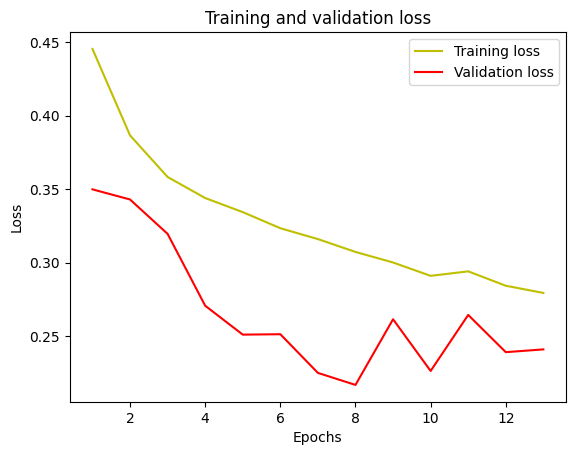

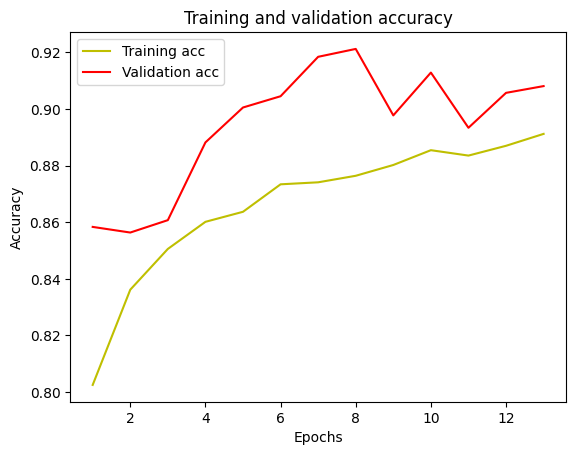

In [32]:
plot_learning_curves(history)

In [34]:
# predict
# Récupère un batch de données depuis le générateur
images, labels = next(test_data)
predictions = model.predict(images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 324ms/step


/tmp/ipython-input-39-3567216308.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred_class = int(predictions[idx] > 0.5)


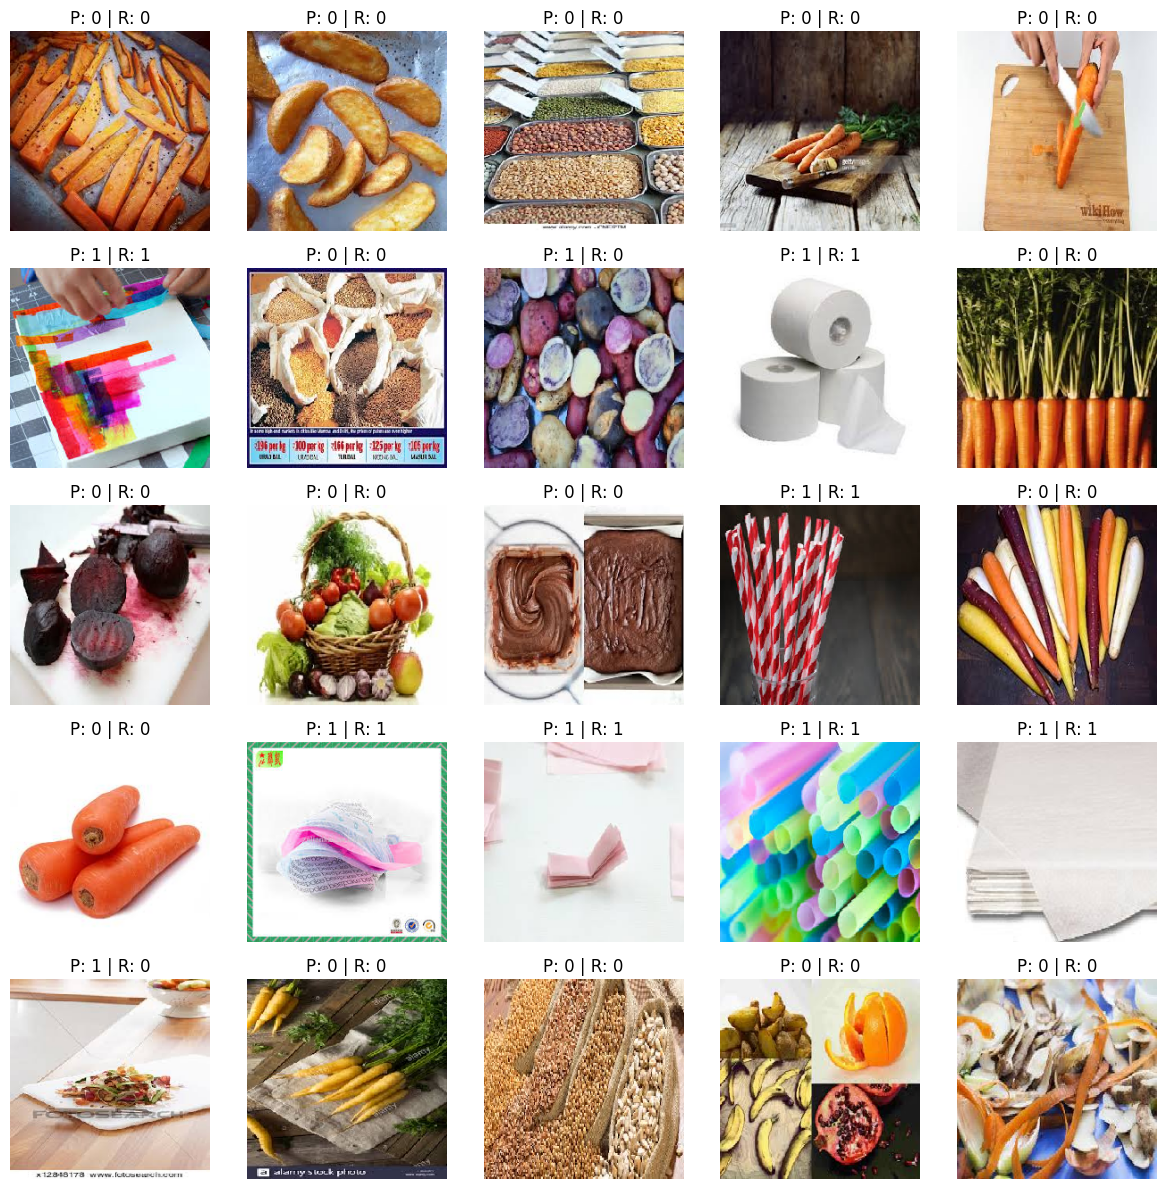

In [39]:
import numpy as np


# Choisir des indices aléatoires
n_images = min(25, len(images))
random_indices = np.random.choice(len(images), n_images, replace=False)

# Création de la figure
plt.figure(figsize=(12, 12))
rows, cols = 5, 5

for i, idx in enumerate(random_indices):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(images[idx].astype("float32").squeeze(), cmap='gray', vmin=0, vmax=1)

    # Classification binaire
    pred_class = int(predictions[idx] > 0.5)
    true_class = int(labels[idx])

    label_map = {0: "0", 1: "1"}
    plt.title(f"P: {label_map[pred_class]} | R: {label_map[true_class]}")
    plt.axis('off')

plt.tight_layout()
plt.show()


In [11]:
# create model with vgg16
def model_vgg16():
  base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
  for layer in base_model.layers:
    layer.trainable = False
  model = tf.keras.Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
  ])
  return model


In [12]:
# compile model vgg16
model_vgg = model_vgg16()
model_vgg.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [13]:
# model summary
model_vgg.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 7, 7, 512)      │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 512)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,780,481 (56.38 MB)

 Trainable params: 65,793 (257.00 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [14]:
checkpoint1 = ModelCheckpoint('best_model_vgg16.h5', monitor='val_loss', save_best_only=True)

In [15]:
# fit model
history_vgg = model_vgg.fit(
    train_data,
    epochs=20,
    validation_data=test_data,
    callbacks=[early_stopping, checkpoint1]
)

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


706/706 ━━━━━━━━━━━━━━━━━━━━ 0s 159ms/step - accuracy: 0.8189 - loss: 0.4016

706/706 ━━━━━━━━━━━━━━━━━━━━ 149s 188ms/step - accuracy: 0.8190 - loss: 0.4015 - val_accuracy: 0.8448 - val_loss: 0.3971
Epoch 2/20
706/706 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 0.8906 - loss: 0.2774

706/706 ━━━━━━━━━━━━━━━━━━━━ 131s 186ms/step - accuracy: 0.8906 - loss: 0.2774 - val_accuracy: 0.8747 - val_loss: 0.3328
Epoch 3/20
706/706 ━━━━━━━━━━━━━━━━━━━━ 123s 174ms/step - accuracy: 0.8959 - loss: 0.2587 - val_accuracy: 0.8691 - val_loss: 0.3577
Epoch 4/20
706/706 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.9017 - loss: 0.2465

706/706 ━━━━━━━━━━━━━━━━━━━━ 123s 174ms/step - accuracy: 0.9017 - loss: 0.2465 - val_accuracy: 0.8866 - val_loss: 0.2906
Epoch 5/20
706/706 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step - accuracy: 0.9048 - loss: 0.2380

706/706 ━━━━━━━━━━━━━━━━━━━━ 123s 174ms/step - accuracy: 0.9048 - loss: 0.2380 - val_accuracy: 0.8898 - val_loss: 0.2812
Epoch 6/20
706/706 ━━━━━━━━━━━━━━━━━━━━ 123s 174ms/step - accuracy: 0.9072 - loss: 0.2268 - val_accuracy: 0.8758 - val_loss: 0.3347
Epoch 7/20
706/706 ━━━━━━━━━━━━━━━━━━━━ 123s 174ms/step - accuracy: 0.9146 - loss: 0.2178 - val_accuracy: 0.8743 - val_loss: 0.3531
Epoch 8/20
706/706 ━━━━━━━━━━━━━━━━━━━━ 123s 174ms/step - accuracy: 0.9165 - loss: 0.2183 - val_accuracy: 0.8802 - val_loss: 0.3070
Epoch 9/20
706/706 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step - accuracy: 0.9138 - loss: 0.2156

706/706 ━━━━━━━━━━━━━━━━━━━━ 123s 174ms/step - accuracy: 0.9138 - loss: 0.2156 - val_accuracy: 0.8882 - val_loss: 0.2804
Epoch 10/20
706/706 ━━━━━━━━━━━━━━━━━━━━ 123s 174ms/step - accuracy: 0.9162 - loss: 0.2120 - val_accuracy: 0.8703 - val_loss: 0.3780
Epoch 11/20
706/706 ━━━━━━━━━━━━━━━━━━━━ 123s 174ms/step - accuracy: 0.9191 - loss: 0.2085 - val_accuracy: 0.8774 - val_loss: 0.3433
Epoch 12/20
706/706 ━━━━━━━━━━━━━━━━━━━━ 123s 174ms/step - accuracy: 0.9221 - loss: 0.2034 - val_accuracy: 0.8866 - val_loss: 0.3221
Epoch 13/20
706/706 ━━━━━━━━━━━━━━━━━━━━ 123s 174ms/step - accuracy: 0.9205 - loss: 0.2024 - val_accuracy: 0.8806 - val_loss: 0.3381
Epoch 14/20
706/706 ━━━━━━━━━━━━━━━━━━━━ 123s 174ms/step - accuracy: 0.9241 - loss: 0.1935 - val_accuracy: 0.8981 - val_loss: 0.2894


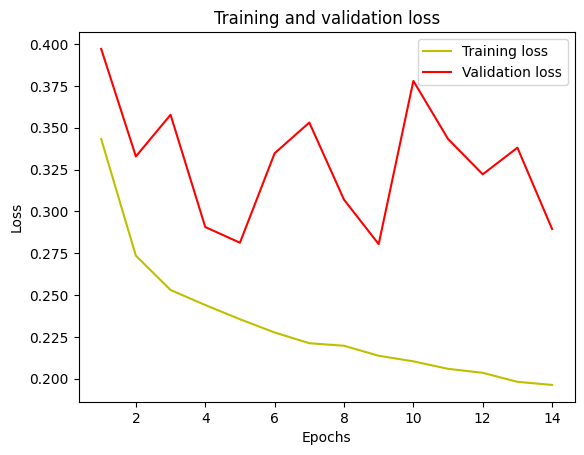

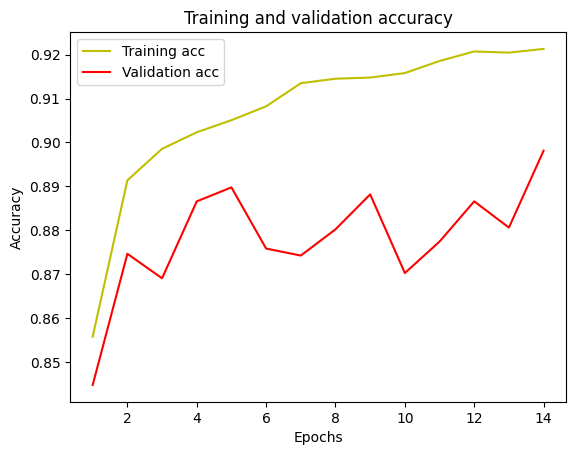

In [16]:
plot_learning_curves(history_vgg)

In [18]:
# predict
# Récupère un batch de données depuis le générateur
images, labels = next(test_data)
predictions = model_vgg.predict(images)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 790ms/step


/tmp/ipython-input-19-3567216308.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  pred_class = int(predictions[idx] > 0.5)


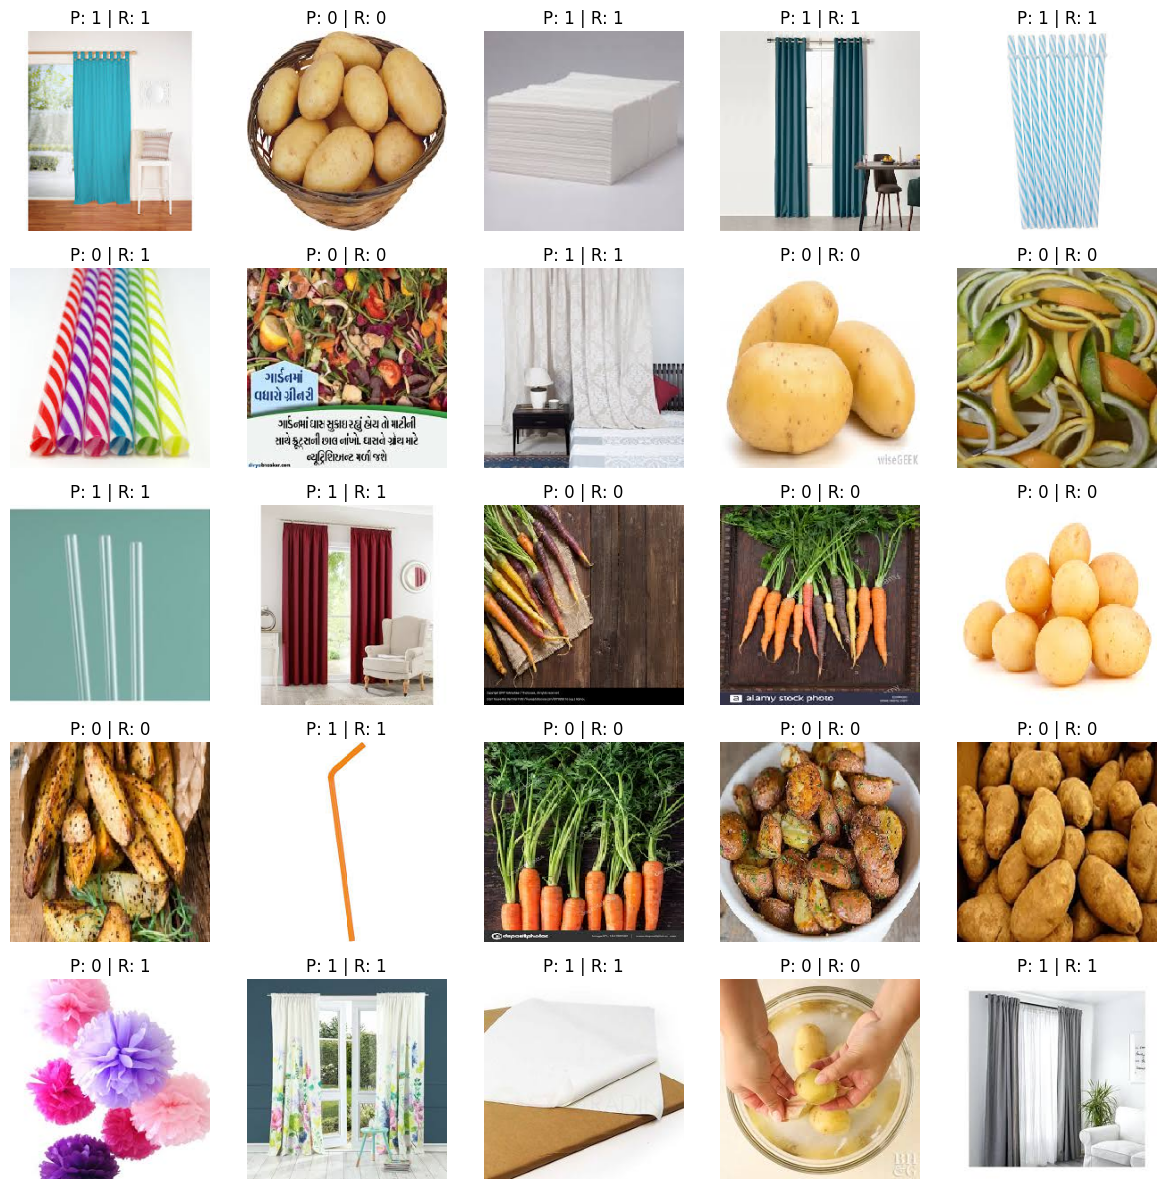

In [19]:
import numpy as np


# Choisir des indices aléatoires
n_images = min(25, len(images))
random_indices = np.random.choice(len(images), n_images, replace=False)

# Création de la figure
plt.figure(figsize=(12, 12))
rows, cols = 5, 5

for i, idx in enumerate(random_indices):
    plt.subplot(rows, cols, i + 1)
    plt.imshow(images[idx].astype("float32").squeeze(), cmap='gray', vmin=0, vmax=1)

    # Classification binaire
    pred_class = int(predictions[idx] > 0.5)
    true_class = int(labels[idx])

    label_map = {0: "0", 1: "1"}
    plt.title(f"P: {label_map[pred_class]} | R: {label_map[true_class]}")
    plt.axis('off')

plt.tight_layout()
plt.show()
